<a href="https://colab.research.google.com/github/sandeepbansode/Basic_Python_Assignments/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :Reviewing customers past and on that Predict potential customrs who can buy our service.**

# **Problem Discription**

we hav large number of customers. our salse team would liketo call potential customers who can buy our service. We don't have enough manpower and time to call reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price. 

# **You are given following information**

* 	InvoiceNo	
* StockCode	
* Description	
* Quantity	
* InvoiceDate	
* UnitPrice	
* CustomerID	
* Country

# **Work Flow**

* Customer segmentation.
* Find Potential Vs Non Potential Customers.
* Who Can Buy Our Services In Current Month. Prediction (Predicted Sales For Future).

* Customer Lifetime Value (cltv) --Live vs Dead Customers.

* Cohort Analysis.

* Lifetime Pacakage -- 
  --Recency , Frequency , Monetary Analysis.



# **1.Lets Invite Some Libraries.**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 

In [ ]:
#Lets inport data

data = pd.read_excel('/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx')

# 2. Reviewing Our Data

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#checking info of our dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#there are 541909 rows and 8 columns in our dataset
data.shape


(541909, 8)

In [ ]:
# Names Of columns in our dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#most of order are in year 2011
data.InvoiceDate.value_counts()


2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

In [ ]:
#there are unique 4372 customers from we get order 
data.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

# 3. Dealing with negative values in Quantity column in Dataset

In [ ]:
#there are some values in Quantity are in negative
data.Quantity.value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [ ]:
#Dealing with negative values in Quantity
data['Quantity'] = data['Quantity'].abs()

data.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270954,560601,22138,BAKING SET 9 PIECE RETROSPOT,1,2011-07-19 17:17:00,4.95,16764.0,United Kingdom
148468,549240,48138,DOORMAT UNION FLAG,1,2011-04-07 11:37:00,7.95,15910.0,United Kingdom
148469,549240,23154,SET OF 4 JAM JAR MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148470,549240,23156,SET OF 5 MINI GROCERY MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148472,549240,21199,PINK HEART CONFETTI IN TUBE,1,2011-04-07 11:37:00,1.65,15910.0,United Kingdom
...,...,...,...,...,...,...,...,...
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


# 4. Checking for null values

In [ ]:
#there are null values in Description and CustomerID column
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#checking the % of null values in our dataset
missing_values = pd.DataFrame()
missing_values['column'] = data.columns

missing_values['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]


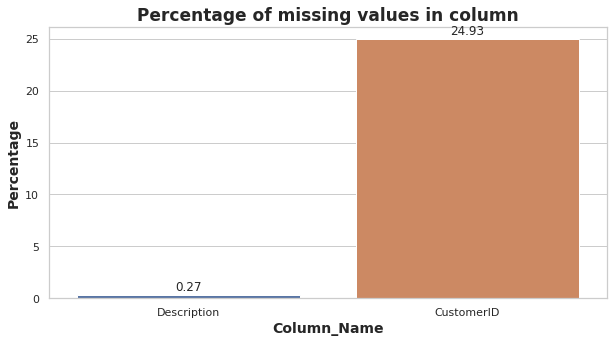

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

Description column and CustomerID contains 0.27 and 24.93% null values. But Description this column is not useful for our analysis.and with out CustomerID we can not identify customer and can not offer anything Hence we will neglect these null values.

# Heat map for missing values

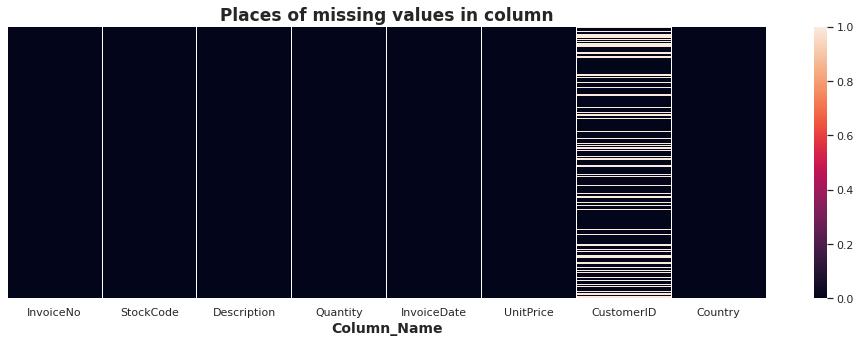

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

we can see the only null values in CustomerID are noticiable. but we have to drop that.

In [ ]:
#we will Drop null values
data.dropna(inplace = True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Unique Values In Each Feature Coulmn**

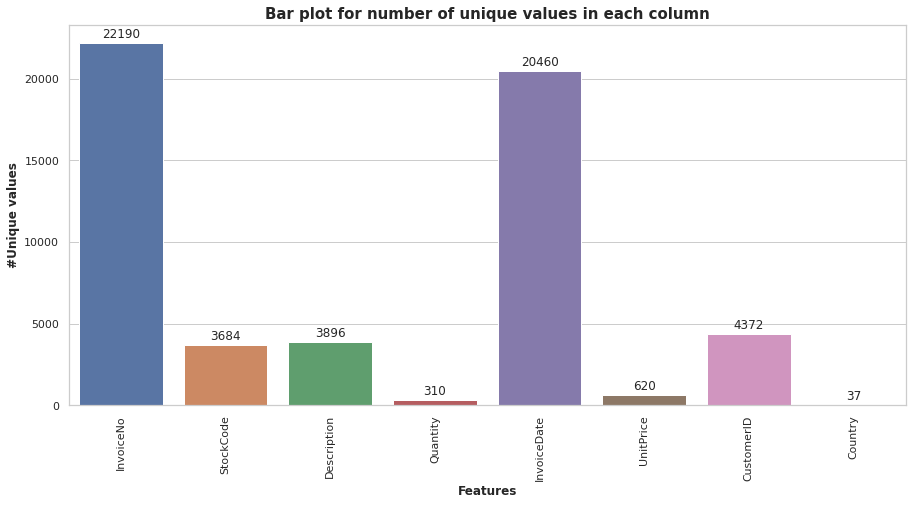

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = data.columns
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Going deeper in Data

In [ ]:
#Checking range of unit price

#data.sort_values('UnitePrice', ascending=False , inplace = True )
data.sort_values("UnitPrice", axis = 0, ascending = False,
                 inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
268027,C560372,M,Manual,1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
...,...,...,...,...,...,...,...,...
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom
187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.00,17667.0,United Kingdom


In [ ]:
data.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


we can see there are some quantity showing unite price zero. unit price must not be zero so we add some minimul amount so we can consider them

In [ ]:
df = data

In [ ]:
df.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


In [ ]:
col = data['UnitPrice']
col.replace(to_replace = 0.00, value = 0.1, inplace=True)

# we will find total puchase made by each customer

adding new coloumn in datase as total purchase amount

In [ ]:
TotalPurchaseAmount = df.Quantity * df.UnitPrice

df["Total_Revenue_Generated"] = TotalPurchaseAmount

display(df.sort_values("Total_Revenue_Generated", ascending = False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080,16446.0,United Kingdom,168469.600
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080,16446.0,United Kingdom,168469.600
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,77183.600
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040,12346.0,United Kingdom,77183.600
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098.0,United Kingdom,38970.000
...,...,...,...,...,...,...,...,...,...
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001


# we will see the repation of customer

In [ ]:
repeated_customers = df.CustomerID.value_counts()

In [ ]:
#see top 10 most repeated customers
repeated_customers.head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [ ]:
df2 = df.groupby("CustomerID" , as_index = False)

In [ ]:
df.groupby('CustomerID' , 'Total_Revenue_Generated')

ValueError: ignored

In [ ]:
df.shape

(406829, 9)

In [ ]:
# df2 = df1.loc[:, ["CustomerID", "Total_Revenue_Generated", ]]



In [ ]:
#df1.groupby('CustomerID')#,as_index = False)
'''def groupby(by=None, axis: Axis=0, level: (Level | None)=None, as_index: bool=True, sort: bool=True, group_keys: bool=True, 
squeeze: (bool | lib.NoDefault)=no_default, observed: bool=False, dropna: bool=True) ->DataFrameGroupBy''' 
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,54.00
541769,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,30.00
541770,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,30.00
541771,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,30.00


In [ ]:
#df3 = df2.sort_values("Total_Revenue_Generated" , ascending = False , ignore_index= True )
#df3.head()

In [ ]:
#top 10 customers who gives most revenue
#df4 = df3.head(10)

In [ ]:
#import seaborn as sns
#sns.barplot(x = "CustomerID", y = "Total_Revenue_Generated" , data = df3.head(10))


In [ ]:
#df3.head(10)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
